# ROAD TRAFFIC SIGN RECOGNITION

## Importing the required libraries

In [38]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

In [40]:
from PIL import Image
import os

## Data Exploration

In [41]:
train_dataset = pd.read_csv("input/gtsrb-german-traffic-sign/Train.csv")

In [42]:
train_dataset.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


#### Roi.X1 :  The top-left coordinate of the bounding box is represented as Roi.X1
#### Roi.Y1 :  The top-right coordinate of the bounding box is represented as Roi.X2
#### Roi.X2 :  The bottom-left coordinate of the bounding box is represented as Roi.Y1
#### Roi.Y2 :  The bottom-right coordinate of the bounding box is represented as Roi.Y2

### The same interpretation goes with the 'test.csv' dataset

In [43]:
test_dataset = pd.read_csv("input/gtsrb-german-traffic-sign/Test.csv")

In [44]:
test_dataset.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [45]:
data = []
labels = []

classes = 43

cur_path = os.getcwd()

In [47]:
for i in range (classes):
    path = os.path.join(cur_path, 'input\\gtsrb-german-traffic-sign\\Train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

Error loading image
Error loading image


In [12]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [15]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# CNN - MINI RESNET

In [16]:
# Creating a Sequential() model by passing a list of layer instances as present in the further steps.
model = Sequential()

# We need to implement a convo layer to extract the features of the images.
# Also, here we are utilising the ReLU activation layer to convert all negative values to zero.
# Convolution Layer 1
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))

# After the construction of the above convolution layer. Now we need to apply max pooling
# This is required so as to reduce the spatial volume of the image before feeding the above convo layer to the Fully Connected layer. 
# Pooling Layer 1
model.add(MaxPool2D(pool_size=(2,2)))

# The dropout layer prevents overfitting and removes some of the neurons while the model is being trained. Hence we are required to implement this layer in our CNN model architechture.
# We are choosing the dropout rate as 0.25 because it helps in gradually increasing the accuracy and reducing the loss.
# Dropout layer 1
model.add(Dropout(rate=0.25))

# Convolution Layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# Pooling Layer 2
model.add(MaxPool2D(pool_size=(2,2)))

# Dropout Layer 2
model.add(Dropout(rate=0.25))

# The next step is to implement a Flatten layer to transform a two-dimensional matrix of features into a vector that can be fed into a fully connected neural network classifier.
model.add(Flatten())

# After the implementation of the above steps we are required to create a Fully Connected Layer (Dense Layer).
# Here the results of the above 2 convolutional layers are fed through to generate a prediction.
# To this dense layer we need to again add a dropout layer.
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))

# As the problem statement is a mutli classification problem we are required to use softmax in the last layer of the CNN.
model.add(Dense(43, activation='softmax'))

# We need to compile the model with Adam Optimizer as it performs well and categorical_crossentropy because our dataset has multiple classes to be classified.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 36s 73ms/step - loss: 2.2730 - accuracy: 0.4428 - val_loss: 0.7494 - val_accuracy: 0.8289
Epoch 2/15
491/491 [==============================] - 36s 73ms/step - loss: 0.8098 - accuracy: 0.7641 - val_loss: 0.3335 - val_accuracy: 0.9129
Epoch 3/15
491/491 [==============================] - 36s 73ms/step - loss: 0.5741 - accuracy: 0.8298 - val_loss: 0.2270 - val_accuracy: 0.9373
Epoch 4/15
491/491 [==============================] - 36s 73ms/step - loss: 0.4498 - accuracy: 0.8648 - val_loss: 0.1791 - val_accuracy: 0.9505
Epoch 5/15
491/491 [==============================] - 36s 72ms/step - loss: 0.3515 - accuracy: 0.8956 - val_loss: 0.1642 - val_accuracy: 0.9513
Epoch 6/15
491/491 [==============================] - 35s 71ms/step - loss: 0.2865 - accuracy: 0.9118 - val_loss: 0.1249 - val_accuracy: 0.9601
Epoch 7/15
491/491 [==============================] - 35s 71ms/step - loss: 0.2467 - accuracy: 0.9252 - val_loss: 0.0934 - val_accuracy:

Text(0, 0.5, 'Accuracy')

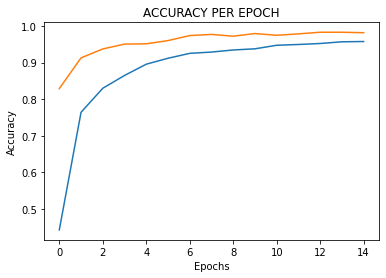

In [18]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('ACCURACY PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

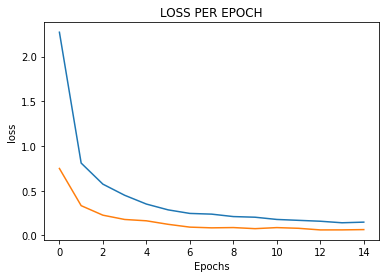

In [19]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('LOSS PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [20]:
from sklearn.metrics import accuracy_score

In [ ]:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test=np.array(data)
pred = model.predict(X_test)

print(accuracy_score(labels, pred))

In [29]:
model.save('model/model1.h5')

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import tensorflow as tf
#import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

! pip install visualkeras
import visualkeras


import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)
print(tf.test.is_gpu_available())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

False
Num GPUs Available:  0


In [17]:
#Pre-process image size
IMAGE_RES = 32
AUTOTUNE = tf.data.experimental.AUTOTUNE

#Training parameters
LEARNING_RATE = 0.001
BATCH_SIZE = 64
EPOCHS = 30

In [20]:
meta_df =  pd.read_csv('input/gtsrb-german-traffic-sign/Meta.csv')
n_classes = meta_df["ClassId"].nunique()
n_classes

43

In [21]:
data_df = pd.read_csv('input/gtsrb-german-traffic-sign/Train.csv',usecols=['ClassId', 'Path'])
data_df.head()

,ClassId,Path
0,20,Train/20/00020_00000_00000.png
1,20,Train/20/00020_00000_00001.png
2,20,Train/20/00020_00000_00002.png
3,20,Train/20/00020_00000_00003.png
4,20,Train/20/00020_00000_00004.png


In [22]:
test_df = pd.read_csv('input/gtsrb-german-traffic-sign/Test.csv',usecols=['ClassId', 'Path'])
test_df.head()

,ClassId,Path
0,16,Test/00000.png
1,1,Test/00001.png
2,38,Test/00002.png
3,33,Test/00003.png
4,11,Test/00004.png


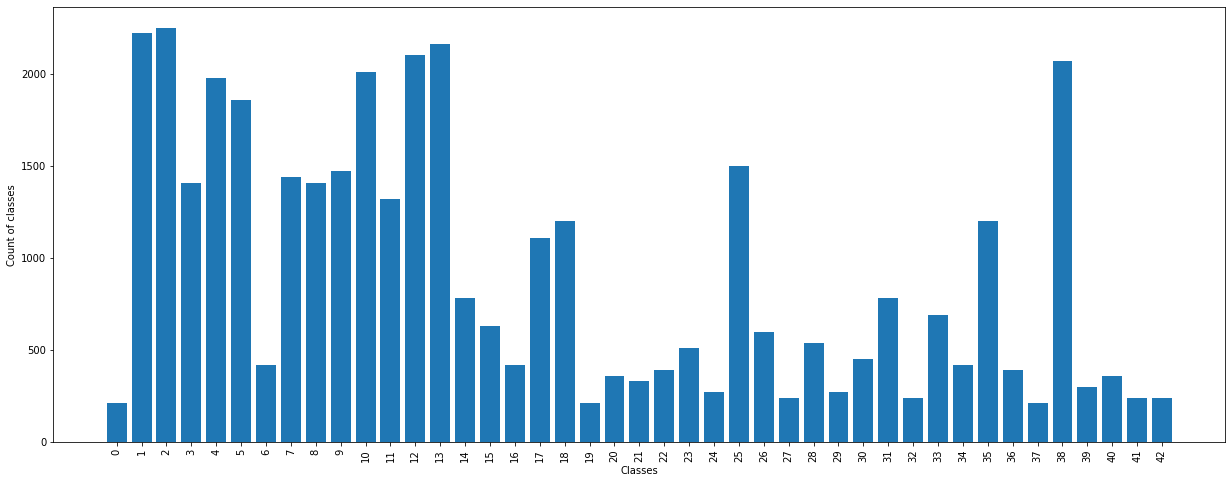

In [23]:
dist = data_df['ClassId'].value_counts()

plt.figure(figsize=(21, 8))
plt.bar(dist.index, dist.values)
plt.xlabel('Classes')
plt.ylabel('Count of classes')
plt.xticks(dist.index, rotation='vertical')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X = "input/gtsrb-german-traffic-sign/" + data_df['Path'].values
y = data_df['ClassId'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_test = "input/gtsrb-german-traffic-sign/" + test_df['Path'].values
y_test = test_df['ClassId'].values

In [26]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=int64)

In [27]:
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_RES, IMAGE_RES])
    image /= 255.0  # normalize to [0,1] range

    return image

In [28]:
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def load_and_preprocess_from_path_label(path, label):
    return load_and_preprocess_image(path), label

In [29]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_batches = train_ds.map(load_and_preprocess_from_path_label).batch(BATCH_SIZE).prefetch(1)

valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
validation_batches = valid_ds.map(load_and_preprocess_from_path_label).batch(BATCH_SIZE).prefetch(1)

test_data = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_batches = test_data.map(load_and_preprocess_from_path_label).batch(BATCH_SIZE).prefetch(1)

# LeNet-5 CNN 

In [30]:
# Create new LeNet-5 model
model = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMAGE_RES, IMAGE_RES, 3)),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Conv2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),
    layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'),   
    layers.Conv2D(256, kernel_size=(5, 5), strides=(1, 1), activation='relu',padding="valid"),
    layers.MaxPooling2D(pool_size=(2, 2),strides=(1, 1), padding='valid'), 
    layers.Flatten(),
    layers.Dense(120, activation='relu',kernel_regularizer='l2'),
    layers.Dense(84, activation='relu',kernel_regularizer='l2'),
    layers.Dense(n_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRota  (None, 32, 32, 3)        0         
 tion)                                                           
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 16)       0

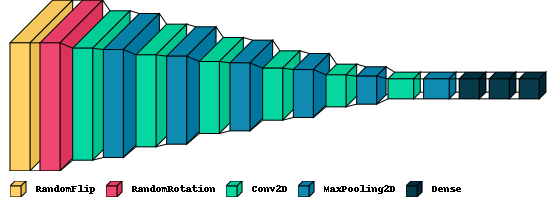

In [31]:
visualkeras.layered_view(model, type_ignore=[layers.Flatten], legend=True)

In [33]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

history = model.fit(train_batches, epochs=50, validation_data=validation_batches, callbacks=[callback])

Epoch 1/5
491/491 [==============================] - 74s 150ms/step - loss: 0.6252 - accuracy: 0.8279 - val_loss: 0.5114 - val_accuracy: 0.8512
Epoch 2/5
491/491 [==============================] - 74s 151ms/step - loss: 0.4817 - accuracy: 0.8694 - val_loss: 0.4109 - val_accuracy: 0.8908
Epoch 3/5
491/491 [==============================] - 77s 157ms/step - loss: 0.4044 - accuracy: 0.8940 - val_loss: 0.5376 - val_accuracy: 0.8629
Epoch 4/5
491/491 [==============================] - 74s 151ms/step - loss: 0.3590 - accuracy: 0.9078 - val_loss: 0.3437 - val_accuracy: 0.9110
Epoch 5/5
491/491 [==============================] - 74s 150ms/step - loss: 0.3330 - accuracy: 0.9156 - val_loss: 0.2831 - val_accuracy: 0.9288


Text(0, 0.5, 'Accuracy')

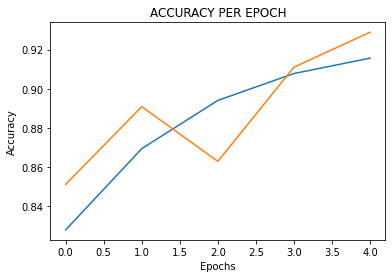

In [34]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
plt.title('ACCURACY PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

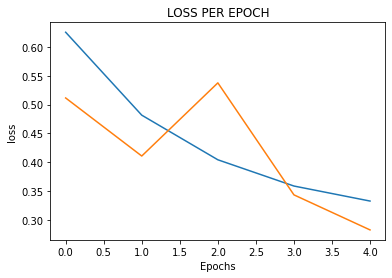

In [35]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('LOSS PER EPOCH')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [36]:
# Evaluate the model on the validation set
print("Evaluate on validation data")
results = model.evaluate(validation_batches)
print("validation loss, validation acc:", results)

Evaluate on validation data
123/123 [==============================] - 5s 37ms/step - loss: 0.2831 - accuracy: 0.9288
validation loss, validation acc: [0.2830527126789093, 0.928844690322876]
